# Some Basics

In [108]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import hotstepper as hs
from hotstepper import Step, Steps
import hotstepper.samples as samples

Define some primative step(s) and see what we can do with these building blocks.

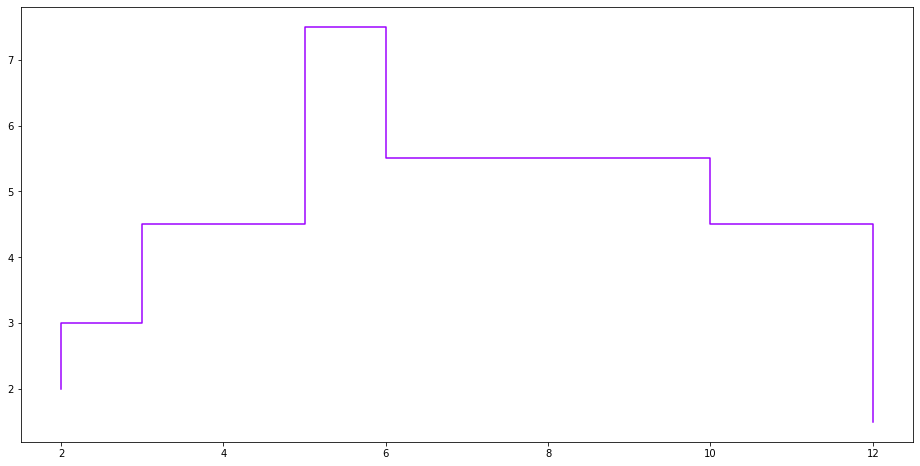

In [109]:
stp1 = Step(5,12,3)
stp2 = Step(end=6,weight=2)
stp3 = Step(3,weight=1.5)
stp4 = Step(2,10)

combined = Steps().add([stp1,stp2,stp3,stp4])

ax = combined.plot(label='Combined')


We can have a look at the individual step objects that have combined to make this Steps object.

Steps, and Step are actually the same object under the hood, Step is a derived class for nothing other than it makes more sense to ask for a Step instead of Steps, they both behave the same and have the same methods and attributes.

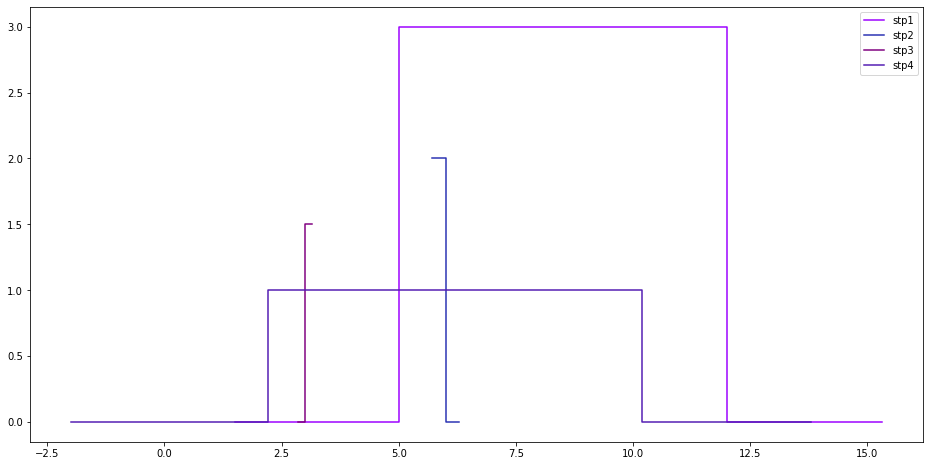

In [110]:

ax = stp1.plot(label='stp1')
stp2.plot(ax=ax,label='stp2')
stp3.plot(ax=ax,label='stp3')
stp4.plot(ax=ax,label='stp4')

ax.legend()

Ok, now we have some Step and Steps object, these behave like Numpy functions as well as Python objects, so we can, for examples, just pretend they are functions and we can plot them s such.

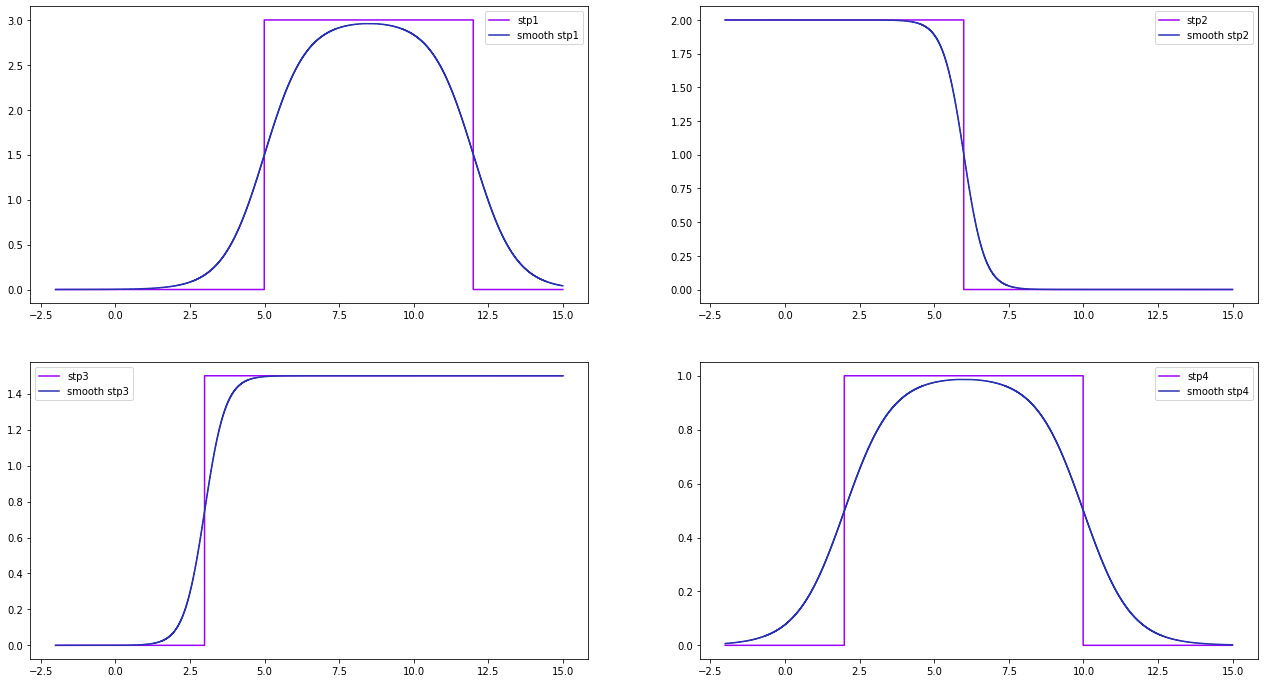

In [111]:
fig, (ax1,ax2) = plt.subplots(nrows = 2, ncols=2, figsize=(22,12))
x = np.arange(-2,15,0.01)

ax1[0].step(x,stp1(x),label='stp1')
ax1[1].step(x,stp2(x),label='stp2')
ax2[0].step(x,stp3(x),label='stp3')
ax2[1].step(x,stp4(x),label='stp4')

ax1[0].step(x,stp1.smooth_step(x),label='smooth stp1')
ax1[1].step(x,stp2.smooth_step(x,smooth_factor=0.7),label='smooth stp2')
ax2[0].step(x,stp3.smooth_step(x,smooth_factor=0.7),label='smooth stp3')
ax2[1].step(x,stp4.smooth_step(x),label='smooth stp4')

ax1[0].legend();
ax1[1].legend();
ax2[0].legend();
ax2[1].legend();


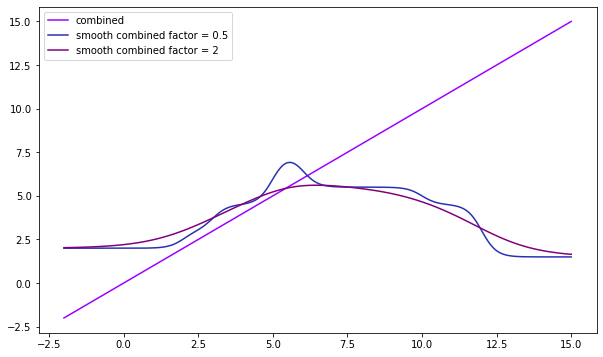

In [112]:
fig, ax = plt.subplots(figsize=(10,6))
x = np.arange(-2,15,0.001)

smooth_fact1 = 0.5
smooth_fact2 = 2

ax.step(x,(x),label='combined')
ax.step(x,combined.smooth_step(x,smooth_factor=smooth_fact1),label='smooth combined factor = {}'.format(smooth_fact1))
ax.step(x,combined.smooth_step(x,smooth_factor=smooth_fact2),label='smooth combined factor = {}'.format(smooth_fact2))

ax.legend();

How about some math with steps?

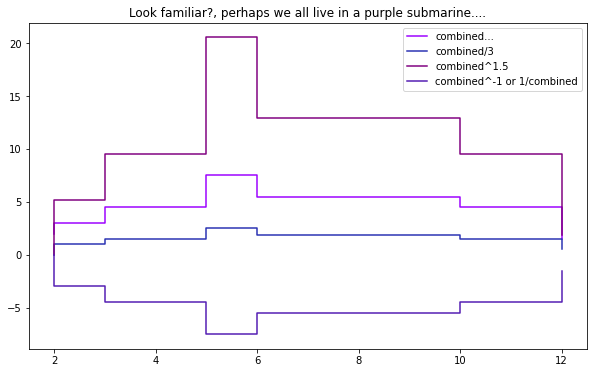

In [113]:
combined_math = stp1 + stp2 + stp3 + stp4

ax = combined_math.plot(figsize=(10,6),label='combined...')
(combined_math/3).plot(ax=ax,label='combined/3')
(combined_math**1.5).plot(ax=ax,label='combined^1.5')
(1/combined_math).plot(ax=ax,label='combined^-1 or 1/combined')

ax.set_title('Look familiar?, perhaps we all live in a purple submarine....');
ax.legend();

Alright, let's do some fancy stuff.

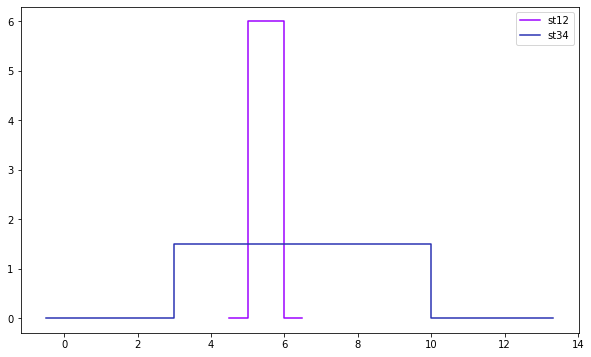

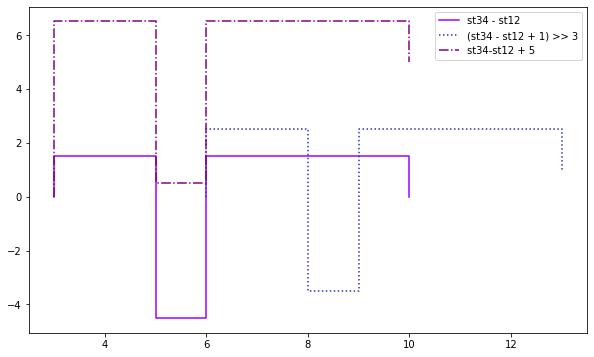

In [114]:
#for reference
# stp1 = Step(5,12,3)
# stp2 = Step(end=6,weight=2)
# stp3 = Step(3,weight=1.5)
# stp4 = Step(2,10)

st12 = stp1*stp2
st34 = stp3*stp4

ax = st12.plot(label='st12',figsize=(10,6))
st34.plot(ax=ax,label='st34')
ax.legend();

ax = (st34-st12).plot(label='st34 - st12',figsize=(10,6))
((st34-st12 + 1) >> 3).plot(ax=ax,label='(st34 - st12 + 1) >> 3',linestyle=":")
(st34-st12 + 5).plot(ax=ax,label='st34-st12 + 5',linestyle="-.")
ax.legend();


We used the shift operator >> to shift the Steps +3 to the right, if we wanted to go back 3, what do you think? (yes, <<).

We also added some constant values to move them around alittle for better visuals and to show that we can just add numbers directly, as these are numpy functions as well as Python objects.

Ok, the last thing for the, hrmm, basic tutorial is some filtering, the easiest way to think of this is whatever boolean condition you would want to use to filter the steps data with, just apply that expression directly to the steps object, for examples.

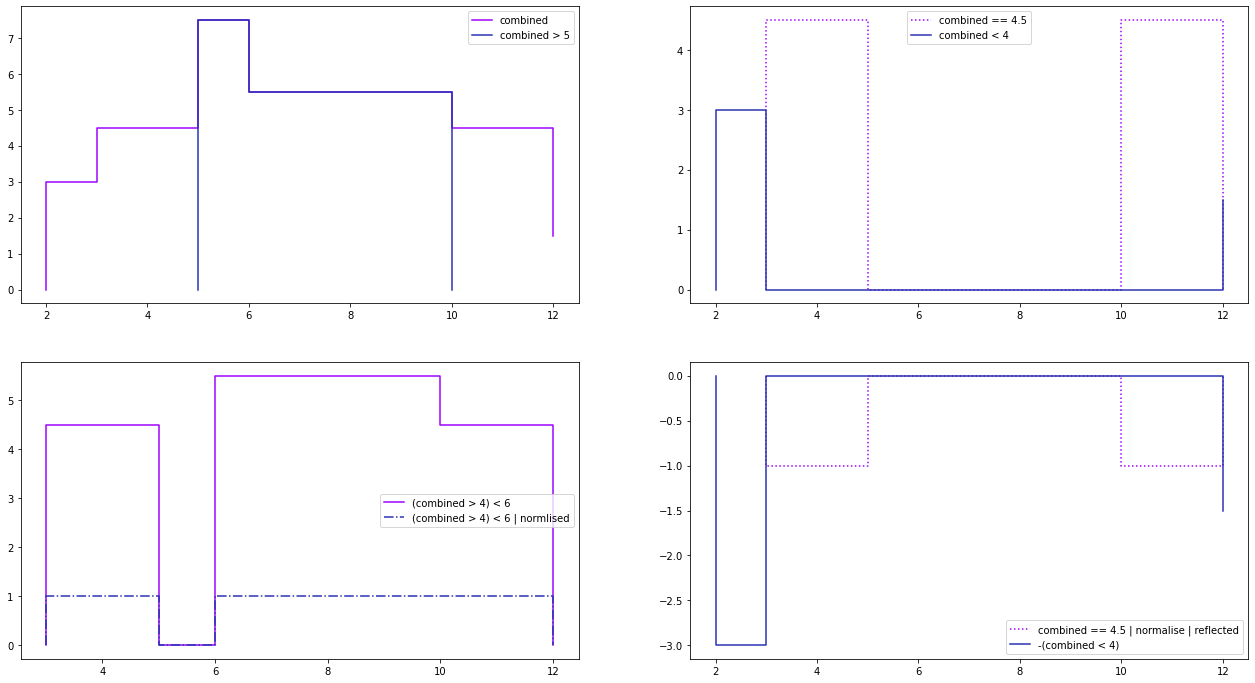

In [115]:
fig, (ax1,ax2) = plt.subplots(nrows = 2, ncols=2, figsize=(22,12))

combined.plot(ax=ax1[0],label='combined')
(combined > 5).plot(ax=ax1[0], label='combined > 5')
(combined == 4.5).plot(ax=ax1[1], label='combined == 4.5',linestyle=':')
(combined < 4).plot(ax=ax1[1], label='combined < 4')

((combined > 4) < 6).plot(ax=ax2[0], label='(combined > 4) < 6')
((combined > 4) < 6).normalise().plot(ax=ax2[0], label='(combined > 4) < 6 | normlised', linestyle='-.')

(combined == 4.5).normalise().reflect().plot(ax=ax2[1], label='combined == 4.5 | normalise | reflected',linestyle=':')
(-(combined < 4)).plot(ax=ax2[1], label='-(combined < 4)')

ax1[0].legend();
ax1[1].legend();
ax2[0].legend();
ax2[1].legend();